# Load the environment and the data

In [2]:
# load environment 
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
import scipy.optimize

In [12]:
# columns:
# fraction of the target dataset,     accuracy for each epoch on the source,    accuracy for each epoch on the target 

# for the attention model
data = [
    [0.008, [0.705, 0.785, 0.83, 0.825, 0.86, 0.84, 0.84, 0.85, 0.85, 0.85], [0.745, 0.815, 0.825, 0.77, 0.785, 0.825, 0.805, 0.775, 0.82, 0.85]],
    [0.006, [0.705, 0.785, 0.83, 0.825, 0.86, 0.84, 0.84, 0.85, 0.85, 0.85], [0.745, 0.815, 0.825, 0.77, 0.785, 0.825, 0.805, 0.775, 0.82, 0.825]],
    [0.004, [0.735, 0.84, 0.87, 0.87, 0.875, 0.895, 0.9, 0.905, 0.905, 0.905], [0.655, 0.72, 0.755, 0.785, 0.8, 0.84, 0.815, 0.81, 0.83, 0.845]],
    [0.003, [0.66, 0.785, 0.83, 0.86, 0.85, 0.86, 0.86, 0.86, 0.865, 0.865], [0.665, 0.72, 0.76, 0.77, 0.74, 0.77, 0.79, 0.78, 0.76, 0.785]],
    [0.002, [0.68, 0.77, 0.825, 0.845, 0.855, 0.865, 0.865, 0.865, 0.865, 0.865], [0.595, 0.635, 0.715, 0.79, 0.795, 0.8, 0.785, 0.795, 0.785, 0.8]],
    [0.001, [0.75, 0.85, 0.88, 0.88, 0.89, 0.9, 0.9, 0.905, 0.905, 0.905], [0.305, 0.48, 0.5, 0.585, 0.635, 0.665, 0.68, 0.71, 0.72, 0.75]],
    [0.0006, [0.67, 0.77, 0.81, 0.85, 0.87, 0.845, 0.855, 0.86, 0.865, 0.87], [0.105, 0.43, 0.485, 0.595, 0.635, 0.61, 0.65, 0.71, 0.73, 0.715]],
    [0.0005, [0.735, 0.83, 0.85, 0.87, 0.87, 0.885, 0.89, 0.895, 0.895, 0.89], [0.035, 0.25, 0.38, 0.395, 0.42, 0.435, 0.48, 0.5, 0.5, 0.535]],
    [0.0004, [0.76, 0.87, 0.905, 0.92, 0.915, 0.91, 0.915, 0.92, 0.925, 0.93], [0.0, 0.19, 0.265, 0.365, 0.43, 0.455, 0.445, 0.47, 0.5, 0.505]],
    [0.0003, [0.66, 0.785, 0.83, 0.86, 0.85, 0.86, 0.86, 0.86, 0.865, 0.865], [0.0, 0.09, 0.185, 0.225, 0.28, 0.38, 0.405, 0.45, 0.42, 0.46]],
    [0.0001, [0.665, 0.8, 0.845, 0.865, 0.87, 0.87, 0.88, 0.885, 0.885, 0.885], [0.0, 0.01, 0.13, 0.2, 0.27, 0.325, 0.355, 0.385, 0.365, 0.355]]
]

data2 = [
    [0.0002,  [0.915, 0.94, 0.95],  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
    [0.0004,  [0.915, 0.94, 0.95],  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
    [0.0006,  [0.915, 0.94, 0.95],  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.235, 0.48]],
    [0.0008,  [0.915, 0.94, 0.95],  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.225, 0.37, 0.4, 0.415]],
    [0.0012,  [0.915, 0.94, 0.95],  [0.0, 0.0, 0.0, 0.0, 0.38, 0.6, 0.615, 0.64, 0.63, 0.665]],
    [0.0016,  [0.915, 0.94, 0.95],  [0.0, 0.0, 0.0, 0.535, 0.555, 0.59, 0.67, 0.655, 0.66, 0.65]],
    [0.002,  [0.915, 0.94, 0.95],  [0.0, 0.0, 0.41, 0.58, 0.485, 0.595, 0.585, 0.645, 0.65, 0.615]],
    [0.004,  [0.915, 0.94, 0.95],  [0.0, 0.48, 0.495, 0.52, 0.53, 0.595, 0.58, 0.63, 0.63, 0.64]],
    [0.006,  [0.915, 0.94, 0.95],  [0.325, 0.555, 0.615, 0.63, 0.635, 0.65, 0.645, 0.65, 0.655, 0.665]],
    [0.008,  [0.915, 0.94, 0.95],  [0.62, 0.71, 0.735, 0.735, 0.745, 0.735, 0.75, 0.74, 0.76, 0.755]]
]

data2 = [[0.0002,
  [0.85, 0.935],
  [0.0, 0.0, 0.0, 0.11, 0.47, 0.485, 0.485, 0.51, 0.535, 0.545]],
 [0.0004,
  [0.85, 0.935],
  [0.0, 0.26, 0.445, 0.485, 0.51, 0.53, 0.57, 0.62, 0.635, 0.695]],
 [0.0006,
  [0.85, 0.935],
  [0.005, 0.48, 0.375, 0.505, 0.56, 0.705, 0.75, 0.79, 0.825, 0.755]],
 [0.0008,
  [0.85, 0.935],
  [0.305, 0.405, 0.505, 0.585, 0.735, 0.715, 0.795, 0.805, 0.775, 0.815]],
 [0.0012,
  [0.85, 0.935],
  [0.265, 0.43, 0.77, 0.815, 0.835, 0.835, 0.83, 0.86, 0.85, 0.85]],
 [0.0016,
  [0.85, 0.935],
  [0.36, 0.69, 0.775, 0.815, 0.795, 0.78, 0.81, 0.8, 0.805, 0.79]],
 [0.002,
  [0.85, 0.935],
  [0.395, 0.715, 0.79, 0.83, 0.865, 0.905, 0.89, 0.9, 0.9, 0.895]],
 [0.004,
  [0.85, 0.935],
  [0.68, 0.825, 0.92, 0.915, 0.905, 0.89, 0.915, 0.925, 0.915, 0.925]],
 [0.006,
  [0.85, 0.935],
  [0.84, 0.875, 0.925, 0.92, 0.905, 0.93, 0.915, 0.935, 0.94, 0.93]],
 [0.008,
  [0.85, 0.935],
  [0.835, 0.91, 0.915, 0.935, 0.905, 0.925, 0.925, 0.92, 0.92, 0.92]]]

data3 = [
    [1, [0.8708, 0.9, 0.92, 0.93, 0.938, 0.942, 0.946, 0.947, 0.949, 0.9505, 0.952],[ 0.8658, 0.8746, 0.9278, 0.9373, 0.942, 0.945, 0.949, 0.9523, 0.953, 0.955, 0.9580]],
    [0.05, [0.8708, 0.9, 0.92, 0.93, 0.938, 0.942, 0.946, 0.947, 0.949, 0.9505, 0.952],[ 0.5995, 0.6243, 0.6714, 0.7021, 0.730, 0.748, 0.751, 0.7598, 0.769, 0.775, 0.7832]],
    [0.1, [0.8708, 0.9, 0.92, 0.93, 0.938, 0.942, 0.946, 0.947, 0.949, 0.9505, 0.952],[ 0.6053, 0.6609, 0.7196, 0.7536, 0.798, 0.809, 0.816, 0.8266, 0.834, 0.842, 0.8474]],
    [0.2, [0.8708, 0.9, 0.92, 0.93, 0.938, 0.942, 0.946, 0.947, 0.949, 0.9505, 0.952],[ 0.6531, 0.7042, 0.7924, 0.8358, 0.852, 0.862, 0.869, 0.8761, 0.882, 0.886, 0.8895]],
    [0.5, [0.8708, 0.9, 0.92, 0.93, 0.938, 0.942, 0.946, 0.947, 0.949, 0.9505, 0.952],[ 0.7500, 0.8333, 0.8771, 0.8983, 0.907, 0.913, 0.918, 0.9229, 0.926, 0.929, 0.9342]]
]

# Plot the data

<IPython.core.display.Javascript object>


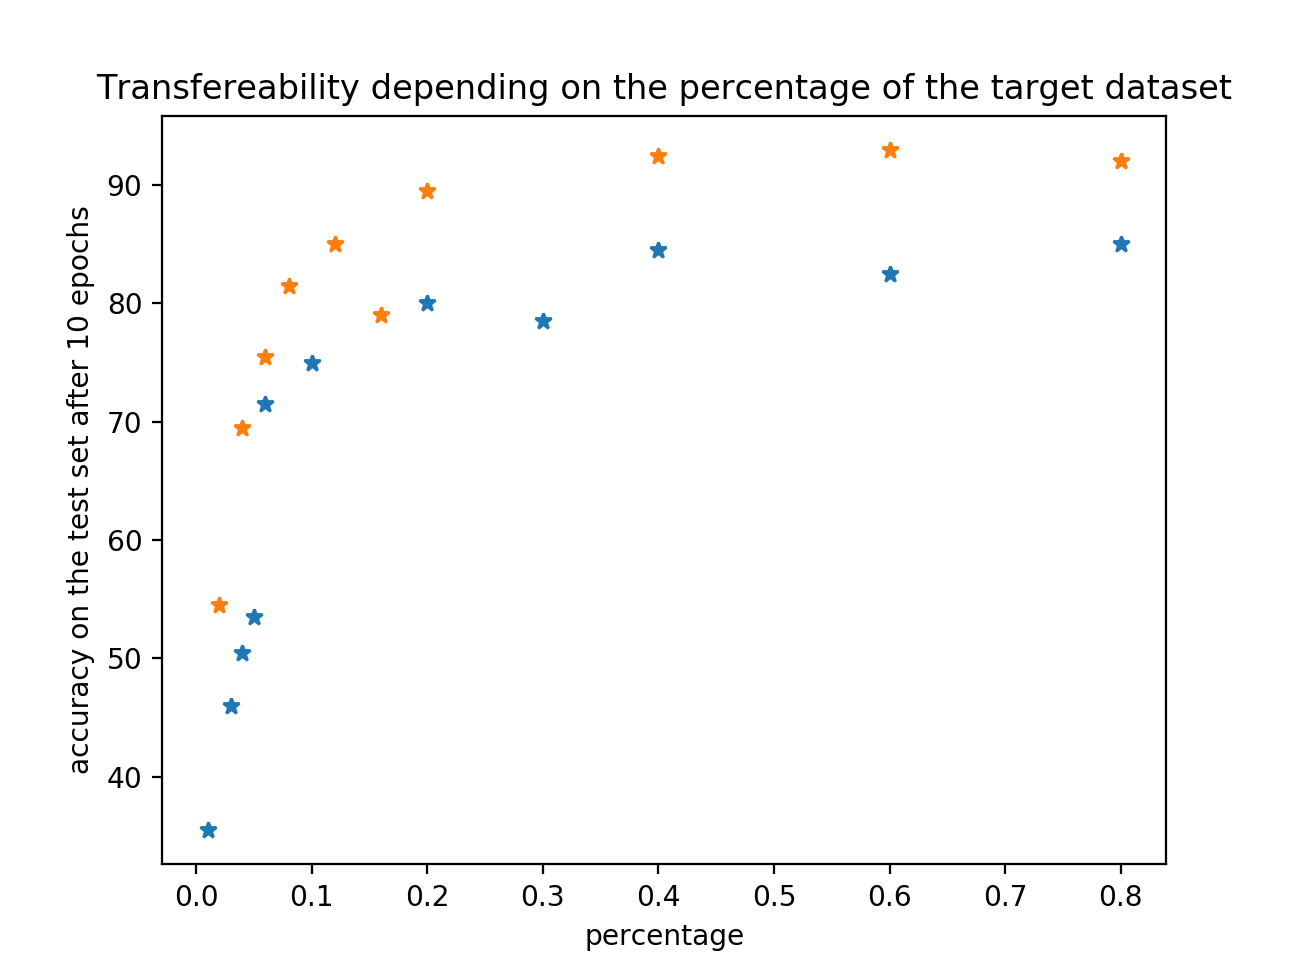

In [13]:
fig = plt.figure()
plt.title('Transfereability depending on the percentage of the target dataset')
plt.xlabel('percentage')
plt.ylabel('accuracy on the test set after 10 epochs')

xdata = np.array([exp[0]*100 for exp in data])
ydata = np.array([exp[2][-1]*100 for exp in data])
plt.plot(xdata, ydata, '*')

xdata2 = np.array([exp[0]*100 for exp in data2])
ydata2 = np.array([exp[2][-1]*100 for exp in data2])
plt.plot(xdata2, ydata2, '*')

xdata3 = np.array([exp[0]*100 for exp in data3])
ydata3 = np.array([exp[2][-1]*100 for exp in data3])
#plt.plot(xdata3, ydata3, '*')

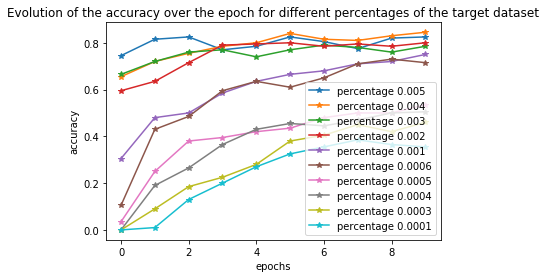

In [19]:
fig = plt.figure()
plt.title('Evolution of the accuracy over the epoch for different percentages of the target dataset')
plt.xlabel('epochs')
plt.ylabel('accuracy')


for exp in data:
    plt.plot(range(len(exp[2])), exp[2], '-*', label='percentage '+str(exp[0]))

plt.legend()

# Sigmoidal regression

https://stackoverflow.com/questions/4308168/sigmoidal-regression-with-scipy-numpy-python-etc 

x0 = 0.04632609746721458 y0 = 0.30048532180443255 c = 0.5151834604718888 k = 57.817722283732245
x0 = -0.42900232445612474 y0 = -1248.9353062678754 c = 1249.8417740012173 k = 18.288586239493238


<IPython.core.display.Javascript object>


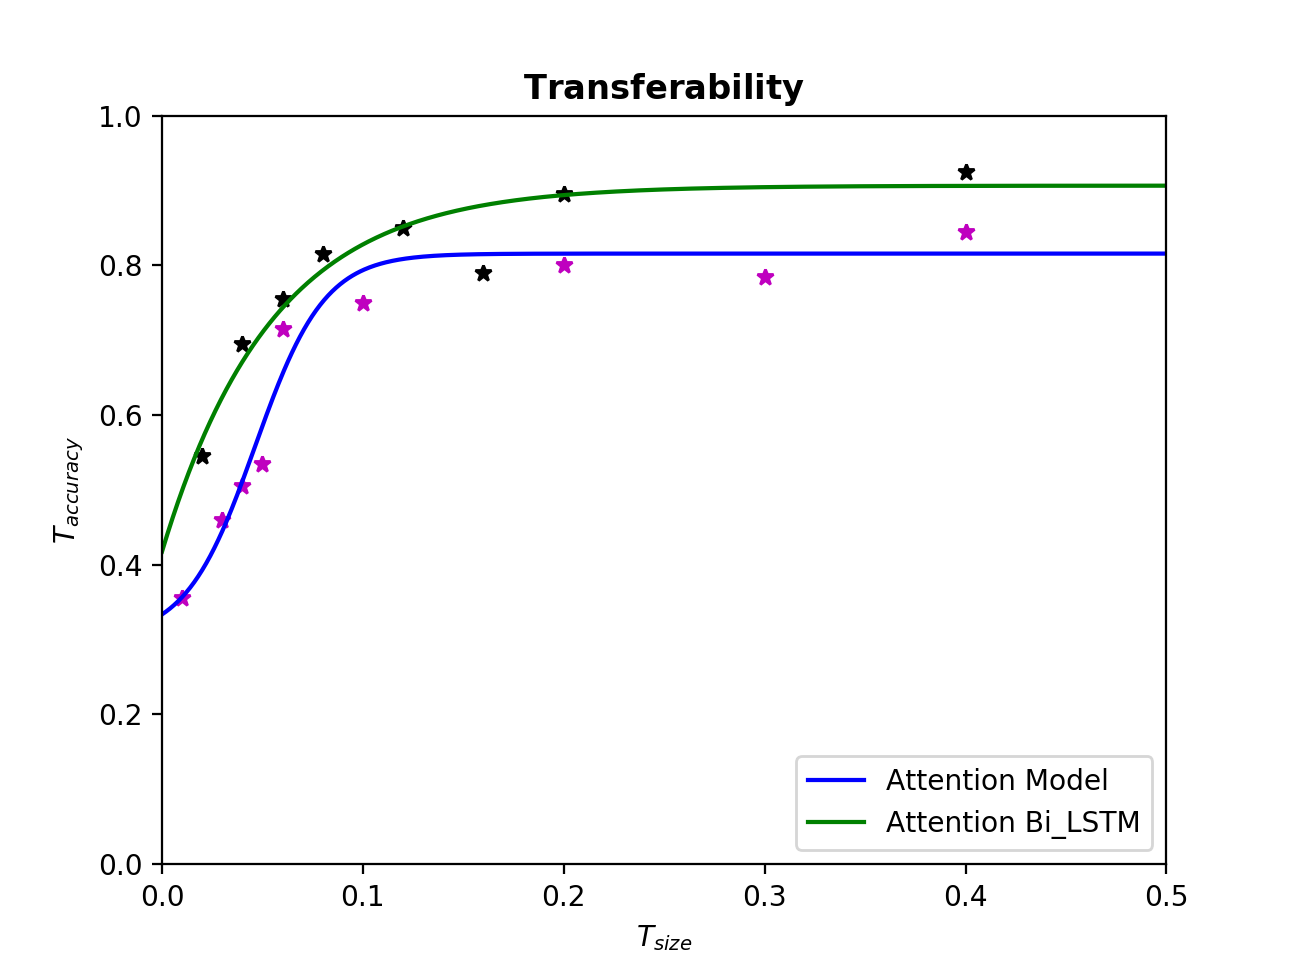

In [14]:
def sigmoid(p,x):
    x0,y0,c,k=p
    y = c / (1 + np.exp(-k*(x-x0))) + y0
    return y

def residuals(p,x,y):
    return y - sigmoid(p,x)

def resize(arr,lower=0.0,upper=1.0):
    arr=arr.copy()
    if lower>upper: lower,upper=upper,lower
    arr -= arr.min()
    arr *= (upper-lower)/arr.max()
    arr += lower
    return arr

## REGRESSION 1
# data1
x = xdata
y = ydata/100

p_guess=(np.median(x),np.median(y),1.0,1.0)
p, cov, infodict, mesg, ier = scipy.optimize.leastsq(residuals,p_guess,args=(x,y),full_output=1)  

x0,y0,c,k=p
print(f'x0 = {x0} y0 = {y0} c = {c} k = {k}')


xp = np.linspace(0, 1.0, 1500)
pxp=sigmoid(p,xp)


## REGRESSION 1
# data2
x2 = xdata2
y2 = ydata2/100

p_guess2=(np.median(x2),np.median(y2),1.0,1.0)
p_guess2=(x0,y0,c,k)
p2, cov2, infodict2, mesg2, ier2 = scipy.optimize.leastsq(residuals,p_guess2,args=(x2,y2),full_output=1)  

x02,y02,c2,k2=p2
print(f'x0 = {x02} y0 = {y02} c = {c2} k = {k2}')

xp2 = np.linspace(0, 1.0, 1500)
pxp2=sigmoid(p2,xp2)

# Plot the results
from matplotlib.font_manager import FontProperties

fig = plt.figure()

plt.title(r"$\bf{Transferability\ }$")
plt.xlabel(r'$T_{size}$') # percentage of the re-training dataset in transfer domain
plt.ylabel(r'$T_{accuracy}$') # accuracy on the test set after 10 epochs
plt.plot(x, y, '*m')
plt.plot(xp, pxp, '-b', label='Attention Model')
plt.plot(x2, y2, '*k')
plt.plot(xp2, pxp2, '-g', label='Attention Bi_LSTM')
#plt.grid(True)
plt.axis((0, 0.5, 0, 1))
plt.legend(loc=4)
plt.show()

In [61]:
#fig.savefig('transferability.svg')
#fig.savefig('transferability.eps')

x0 = 0.04632609746721458 y0 = 0.30048532180443255 c = 0.5151834604718888 k = 57.817722283732245
x0 = -0.42900232445612474 y0 = -1248.9353062678754 c = 1249.8417740012173 k = 18.288586239493238
x0 = -109.1004880863617 y0 = -469.709301521757 c = 470.6594046890654 k = 0.06993540233276536


<IPython.core.display.Javascript object>


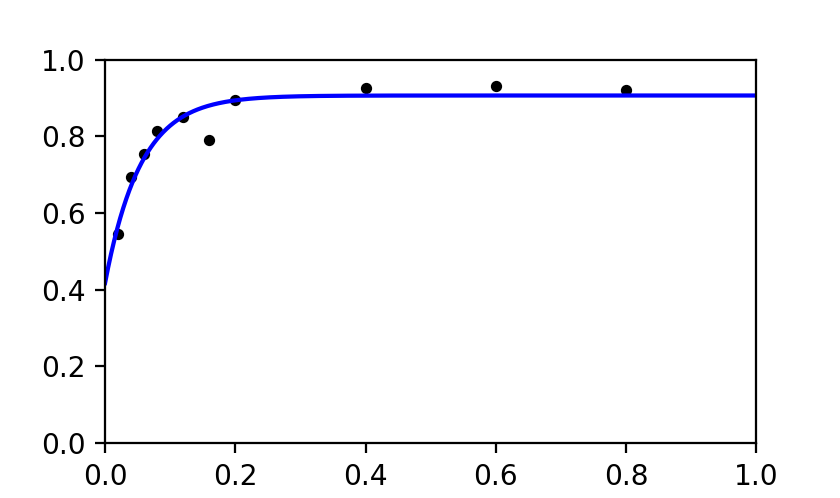

In [16]:
def sigmoid(p,x):
    x0,y0,c,k=p
    y = c / (1 + np.exp(-k*(x-x0))) + y0
    return y

def residuals(p,x,y):
    return y - sigmoid(p,x)

def resize(arr,lower=0.0,upper=1.0):
    arr=arr.copy()
    if lower>upper: lower,upper=upper,lower
    arr -= arr.min()
    arr *= (upper-lower)/arr.max()
    arr += lower
    return arr

## REGRESSION 1
# data1
x = xdata
y = ydata/100

p_guess=(np.median(x),np.median(y),1.0,1.0)
p, cov, infodict, mesg, ier = scipy.optimize.leastsq(residuals,p_guess,args=(x,y),full_output=1)  

x0,y0,c,k=p
print(f'x0 = {x0} y0 = {y0} c = {c} k = {k}')


xp = np.linspace(0, 1.0, 1500)
pxp=sigmoid(p,xp)


## REGRESSION 2
# data2
x2 = xdata2
y2 = ydata2/100

p_guess2=(np.median(x2),np.median(y2),1.0,1.0)
p_guess2=(x0,y0,c,k)
p2, cov2, infodict2, mesg2, ier2 = scipy.optimize.leastsq(residuals,p_guess2,args=(x2,y2),full_output=1)  

x02,y02,c2,k2=p2
print(f'x0 = {x02} y0 = {y02} c = {c2} k = {k2}')

xp2 = np.linspace(0, 1.0, 1500)
pxp2=sigmoid(p2,xp2)


## REGRESSION 3
# data3
x3 = xdata3
y3 = ydata3/100

p_guess3=(5, 0.5, 0.5, 0.1)
p3, cov3, infodict3, mesg3, ier3 = scipy.optimize.leastsq(residuals,p_guess3,args=(x3,y3),full_output=1)  

x03,y03,c3,k3=p3
print(f'x0 = {x03} y0 = {y03} c = {c3} k = {k3}')

xp3 = np.linspace(0, 100, 1500)

#p3 = (5, 0.5, 0.5, 0.1)
pxp3=sigmoid(p3,xp3)


# Plot the results
from matplotlib.font_manager import FontProperties

fig = plt.figure()

#plt.plot(x, y, '.k')
#plt.plot(xp, pxp, '-b', label='Attention Model')
plt.plot(x2, y2, '.k')
plt.plot(xp2, pxp2, '-b', label='Attention Bi_LSTM')
plt.axis((0, 1, 0, 1))

#plt.plot(x3, y3, '.k')
#plt.plot(xp3, pxp3, '-b', label='Log Reg')
#plt.grid(True)
#plt.axis((0, 100, 0, 1))
plt.show()

In [19]:
fig.savefig('sigmoid_bi_lstm.svg')
#fig.savefig('trans_lr.eps')